In [1]:
import torch
import torch.distributions as dist
import numpy as np
import matplotlib.pyplot as plt

import legacyMTT
from deepMTT import DetectionNet
from deepMTT import DetectionNetTruncating

from simulate.simulate_camera import get_camera_image 
from simulate.simulate_camera import add_molecule

In [2]:
from simulate.simulate_test_data import simulate_test_data

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [6]:
%matplotlib inline

In [7]:
device = 'cpu'
detection_model = DetectionNet().to(device)

In [8]:
learning_rate = 1e-6
optimizer = torch.optim.Adam(detection_model.parameters(), lr=learning_rate)

loss_fn_map = torch.nn.BCELoss()    
loss_fn_counts = torch.nn.MSELoss()

In [9]:
for t in range(1):
    X, det_map, n_mols = simulate_test_data()
    map_est = detection_model(X)
    loss = 1000*loss_fn_map(map_est, det_map) + loss_fn_counts(torch.sum(map_est),torch.tensor(n_mols).float())
    if t % 100 == 0:
        print(t, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 76190480.0


In [10]:
loss_fn_map(map_est, det_map).item()

1.7202072143554688

In [11]:
loss_fn_counts(torch.sum(map_est),torch.tensor(n_mols).float()).item()

76188760.0

In [12]:
X, det_map, n_mols = simulate_test_data()
map_est = detection_model(X)

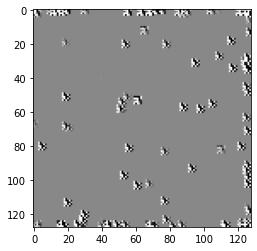

In [13]:
plt.imshow(map_est.squeeze().detach(), cmap='gray')

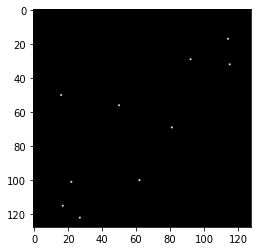

In [14]:
plt.imshow(det_map.squeeze().detach(), cmap='gray')

In [15]:
device = 'cpu'
detection_model2 = DetectionNet().to(device)

In [16]:
learning_rate = 1e-3
optimizer2 = torch.optim.Adam(detection_model2.parameters(), lr=learning_rate)

loss_fn_map2 = torch.nn.MSELoss() #BCELoss() the BCE loss was happy to put p=1 events in the middle of nowhere.
loss_fn_counts2 = torch.nn.MSELoss()

In [17]:
for t in range(1):
    X, det_map, n_mols = simulate_test_data()
    map_est = detection_model2(X)
    loss = loss_fn_map2(map_est, det_map) + loss_fn_counts2(torch.sum(map_est),torch.tensor(n_mols).float())
    if t % 100 == 0:
        print(t, loss.item())
    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()

0 468.91766357421875


In [18]:
X, det_map, n_mols = simulate_test_data()
map_est = detection_model2(X)

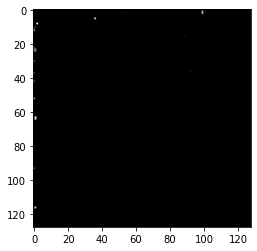

In [19]:
plt.imshow(map_est.squeeze().detach(), cmap='gray')

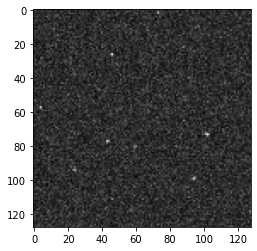

In [20]:
plt.imshow(X.squeeze().detach(), cmap='gray')

In [21]:
map_est.size()

torch.Size([1, 1, 128, 128])

In [22]:
y = torch.nn.functional.pad(map_est,(5,5,5,5))

In [23]:
y.size()

torch.Size([1, 1, 138, 138])

In [24]:
device = 'cpu'
detection_model3 = DetectionNetTruncating().to(device)

In [25]:
learning_rate = 1e-4
optimizer3 = torch.optim.Adam(detection_model3.parameters(), lr=learning_rate)

loss_fn_map3 = torch.nn.MSELoss() #BCELoss() the BCE loss was happy to put p=1 events in the middle of nowhere.
loss_fn_counts3 = torch.nn.MSELoss()

In [26]:
for t in range(1):#(5000):
    X, det_map, n_mols = simulate_test_data()
    map_est = detection_model3(X)
    loss = loss_fn_map3(map_est, det_map) + loss_fn_counts3(torch.sum(map_est),torch.tensor(n_mols).float())
    if t % 100 == 0:
        print(t, loss.item())
    optimizer3.zero_grad()
    loss.backward()
    optimizer3.step()

0 2964176.0


In [27]:
learning_rate = 1e-6
optimizer3 = torch.optim.Adam(detection_model3.parameters(), lr=learning_rate)

loss_fn_map3 = torch.nn.MSELoss() #BCELoss() the BCE loss was happy to put p=1 events in the middle of nowhere.
loss_fn_counts3 = torch.nn.MSELoss()

In [28]:
for t in range(1):#(5000):
    X, det_map, n_mols = simulate_test_data()
    map_est = detection_model3(X)
    loss = loss_fn_map3(map_est, det_map) + loss_fn_counts3(torch.sum(map_est),torch.tensor(n_mols).float())
    if t % 100 == 0:
        print(t, loss.item())
    optimizer3.zero_grad()
    loss.backward()
    optimizer3.step()

0 2817942.25


In [29]:
X, det_map, n_mols = simulate_test_data()
map_est = detection_model3(X)
loss = loss_fn_map3(map_est, det_map) + loss_fn_counts3(torch.sum(map_est),torch.tensor(n_mols).float())
loss.item()

2608989.5

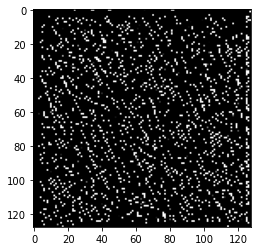

In [30]:
plt.imshow(map_est.squeeze().detach(), cmap='gray')

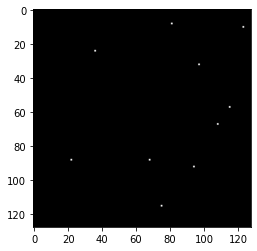

In [31]:
plt.imshow(det_map.squeeze().detach(), cmap='gray')

In [32]:
learning_rate = 1e-8
optimizer3 = torch.optim.Adam(detection_model3.parameters(), lr=learning_rate)

loss_fn_map3 = torch.nn.MSELoss() #BCELoss() the BCE loss was happy to put p=1 events in the middle of nowhere.
loss_fn_counts3 = torch.nn.MSELoss()

In [34]:
for t in range(1):#(5000):
    X, det_map, n_mols = simulate_test_data()
    map_est = detection_model3(X)
    loss = loss_fn_map3(map_est, det_map) + loss_fn_counts3(torch.sum(map_est),torch.tensor(n_mols).float())
    if t % 100 == 0:
        print(t, loss.item())
    optimizer3.zero_grad()
    loss.backward()
    optimizer3.step()

0 2589941.75


In [35]:
loss.item()

2589941.75

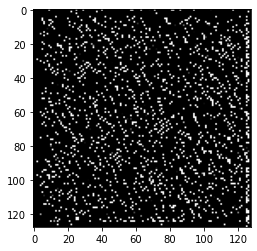

In [36]:
plt.imshow(map_est.squeeze().detach(), cmap='gray')

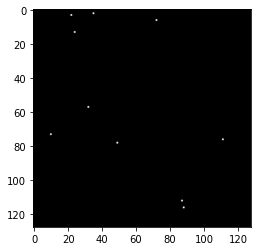

In [37]:
plt.imshow(det_map.squeeze().detach(), cmap='gray')

In [38]:
detection_model3.deep_cnn[0]

Conv2d(1, 3, kernel_size=(7, 7), stride=(1, 1), padding=valid)

In [39]:
detection_model3.deep_cnn[0].weight

Parameter containing:
tensor([[[[ 0.1079, -0.0305, -0.1039, -0.0709, -0.1073, -0.0036, -0.0133],
          [-0.0226, -0.1364,  0.1111, -0.0026, -0.1380, -0.0354, -0.0948],
          [-0.0463,  0.1179,  0.1070, -0.0492, -0.0739,  0.0771,  0.1212],
          [-0.1185,  0.0516,  0.0103,  0.0487,  0.1240,  0.0729,  0.0751],
          [ 0.0013, -0.1085,  0.1166,  0.1295,  0.1266,  0.0465,  0.0696],
          [-0.0458, -0.0590, -0.0095,  0.0458, -0.0389,  0.1239, -0.0185],
          [-0.0983, -0.1224,  0.0292, -0.0991, -0.1226,  0.1144,  0.0954]]],


        [[[ 0.1250, -0.0514, -0.1414,  0.0216,  0.0090, -0.1359,  0.0592],
          [ 0.0557,  0.0881,  0.0021, -0.0774, -0.1134, -0.0790,  0.0363],
          [ 0.0619,  0.0692, -0.1368,  0.0051,  0.1253,  0.1090,  0.0078],
          [-0.0994,  0.0961, -0.0765,  0.0349, -0.0007,  0.0051, -0.0407],
          [-0.0925, -0.0526,  0.0156,  0.0652, -0.0110, -0.0791,  0.1341],
          [-0.0199, -0.1175, -0.0301,  0.0993, -0.0798, -0.0136, -0.0538],

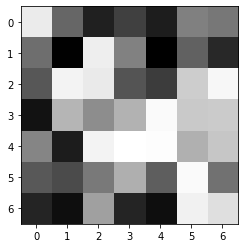

In [40]:
plt.imshow(detection_model3.deep_cnn[0].weight.squeeze().detach()[0], cmap='gray')

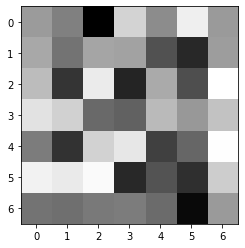

In [41]:
plt.imshow(detection_model3.deep_cnn[0].weight.squeeze().detach()[2], cmap='gray')

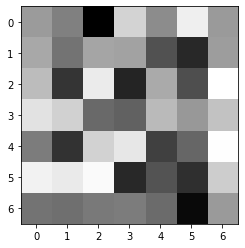

In [42]:
plt.imshow(detection_model3.deep_cnn[0].weight.squeeze().detach()[2], cmap='gray')

In [43]:
detection_model3.deep_cnn[2].weight

Parameter containing:
tensor([[[[-0.1874, -0.1340, -0.1436],
          [ 0.1908,  0.1754,  0.1275],
          [-0.0205,  0.0105,  0.1366]],

         [[-0.1050, -0.1853,  0.0933],
          [ 0.1722, -0.1450,  0.0204],
          [ 0.0703,  0.0280,  0.0304]],

         [[-0.1184, -0.1424, -0.1149],
          [-0.0398,  0.1473,  0.1287],
          [-0.0673, -0.1844,  0.1171]]],


        [[[ 0.1225, -0.1773,  0.0281],
          [ 0.0194, -0.0832, -0.1699],
          [-0.0048, -0.0194,  0.0350]],

         [[ 0.0907, -0.0303,  0.0574],
          [ 0.1709, -0.1812,  0.0045],
          [ 0.0918,  0.0272,  0.0607]],

         [[ 0.1203, -0.0972, -0.1201],
          [ 0.0574,  0.0269, -0.1587],
          [ 0.1549,  0.1848, -0.0771]]],


        [[[ 0.1788,  0.0325,  0.0476],
          [ 0.0976,  0.0795,  0.0234],
          [-0.0461, -0.1130, -0.0781]],

         [[ 0.1108,  0.1529,  0.1719],
          [ 0.1731, -0.1286, -0.0975],
          [-0.0368, -0.0771,  0.1088]],

         [[ 0.0779, -0

In [44]:
detection_model3.deep_cnn[4].weight

Parameter containing:
tensor([[[[ 0.1702, -0.0004, -0.1181],
          [-0.0564, -0.0424,  0.0555],
          [ 0.1319, -0.0144, -0.0402]],

         [[ 0.0405, -0.1803, -0.0633],
          [ 0.1100,  0.0651, -0.0635],
          [-0.0349,  0.0950, -0.0807]],

         [[-0.0980, -0.0907,  0.0373],
          [-0.1618,  0.0208, -0.0525],
          [ 0.1632, -0.1524, -0.1906]]]], requires_grad=True)

In [45]:
wilks_map_fn = legacyMTT.wilks_map

In [46]:
wilks_map_fn

<function legacyMTT.wilks_map(Im, radius, n_pix)>

In [47]:
from deepMTT import WilksNet

In [73]:
device = 'cpu'
detection_model4 = WilksNet().to(device)

In [74]:
learning_rate = 1e-6
optimizer4 = torch.optim.Adam(detection_model4.parameters(), lr=learning_rate)

loss_fn_map4 = torch.nn.MSELoss() #BCELoss() the BCE loss was happy to put p=1 events in the middle of nowhere.
loss_fn_counts4 = torch.nn.MSELoss()

In [76]:
for t in range(5000):
    X, det_map, n_mols = simulate_test_data()
    map_est = detection_model4(X)
    loss = loss_fn_map4(map_est, det_map) + loss_fn_counts4(torch.sum(map_est),torch.tensor(n_mols).float())
    if t % 100 == 0:
        print(t, loss.item())
    optimizer4.zero_grad()
    loss.backward()
    optimizer4.step()

0 659220.4375
100 493426.625
200 413155.0625
300 300788.8125
400 258924.109375
500 212908.15625
600 161280.78125
700 175035.5
800 136297.765625
900 150899.515625
1000 94111.3046875
1100 102825.5234375
1200 72447.0078125
1300 72560.015625
1400 63748.46875
1500 73529.6015625
1600 45635.83203125
1700 39595.96484375
1800 38152.75390625
1900 52557.63671875
2000 36945.171875
2100 39093.3359375
2200 25003.767578125
2300 26408.70703125
2400 29979.24609375
2500 26322.375
2600 28859.5703125
2700 25170.509765625
2800 25792.91015625
2900 11091.201171875
3000 22018.296875
3100 18372.1796875
3200 11495.740234375
3300 13341.1923828125
3400 11019.4306640625
3500 10091.3828125
3600 10418.36328125
3700 10044.4912109375
3800 11428.1123046875
3900 7869.29443359375
4000 9595.359375
4100 6858.97314453125
4200 7360.7724609375
4300 8331.4541015625
4400 4208.72412109375
4500 5581.755859375
4600 4186.65625
4700 6749.96435546875
4800 3282.12255859375
4900 4033.44287109375


In [77]:
for t in range(10000):
    X, det_map, n_mols = simulate_test_data()
    map_est = detection_model4(X)
    loss = loss_fn_map4(map_est, det_map) + loss_fn_counts4(torch.sum(map_est),torch.tensor(n_mols).float())
    if t % 100 == 0:
        print(t, loss.item())
    optimizer4.zero_grad()
    loss.backward()
    optimizer4.step()

0 3268.8818359375
100 2572.61962890625
200 3010.746826171875
300 1950.2772216796875
400 4556.37646484375
500 2702.83056640625
600 1925.9915771484375
700 3262.950439453125
800 1893.6009521484375
900 1003.8218383789062
1000 1397.762939453125
1100 1396.763427734375
1200 4053.15380859375
1300 1385.255859375
1400 1386.6292724609375
1500 2501.32421875
1600 2103.708984375
1700 2044.953369140625
1800 1471.6085205078125
1900 1239.3046875
2000 1962.91455078125
2100 1350.0595703125
2200 1329.221923828125
2300 1565.844970703125
2400 769.6109619140625
2500 1321.2982177734375
2600 732.1688232421875
2700 1225.515380859375
2800 820.3867797851562
2900 683.8837280273438
3000 920.9155883789062
3100 1178.9791259765625
3200 1007.2905883789062
3300 519.5740356445312
3400 378.9462890625
3500 487.7529602050781
3600 673.0438842773438
3700 643.585205078125
3800 614.5785522460938
3900 803.6427001953125
4000 515.6057739257812
4100 357.0516662597656
4200 245.9630126953125
4300 104.50840759277344
4400 364.781677246

In [78]:
learning_rate = 1e-7
optimizer4 = torch.optim.Adam(detection_model4.parameters(), lr=learning_rate)

loss_fn_map4 = torch.nn.MSELoss() #BCELoss() the BCE loss was happy to put p=1 events in the middle of nowhere.
loss_fn_counts4 = torch.nn.MSELoss()

In [79]:
for t in range(50000):
    X, det_map, n_mols = simulate_test_data()
    map_est = detection_model4(X)
    loss = loss_fn_map4(map_est, det_map) + loss_fn_counts4(torch.sum(map_est),torch.tensor(n_mols).float())
    if t % 100 == 0:
        print(t, loss.item())
    optimizer4.zero_grad()
    loss.backward()
    optimizer4.step()

0 24.684511184692383
100 18.584774017333984
200 15.816448211669922
300 0.0013982547679916024
400 15.997909545898438
500 0.0012662482913583517
600 35.339420318603516
700 0.40690749883651733
800 80.99615478515625
900 1.0023292303085327
1000 4.001087188720703
1100 4.0010986328125
1200 9.217361450195312
1300 3.839461326599121
1400 35.953041076660156
1500 0.9804568290710449
1600 9.632034301757812
1700 8.977670669555664
1800 7.074456691741943
1900 0.5215297937393188
2000 0.9652633666992188
2100 0.055591315031051636
2200 1.0010051727294922
2300 0.029969949275255203
2400 7.044609546661377
2500 4.036413192749023
2600 3.660365581512451
2700 3.613382577896118
2800 25.146503448486328
2900 1.0185561180114746
3000 1.0011577606201172
3100 1.0361119508743286
3200 24.729106903076172
3300 1.3921812772750854
3400 10.478660583496094
3500 9.002517700195312
3600 13.14605712890625
3700 8.972915649414062
3800 1.0960394144058228
3900 0.27927276492118835
4000 0.8532288670539856
4100 1.8954874277114868
4200 31.8

33600 3.8591837882995605
33700 25.072139739990234
33800 3.870866298675537
33900 1.4339032173156738
34000 36.25631332397461
34100 1.839491605758667
34200 9.22661304473877
34300 8.084177017211914
34400 1.0022718906402588
34500 4.222987651824951
34600 0.6525744199752808
34700 0.08178840577602386
34800 9.001270294189453
34900 71.03096008300781
35000 0.007849566638469696
35100 4.001472473144531
35200 0.6463267207145691
35300 8.998685836791992
35400 1.9873765707015991
35500 9.184064865112305
35600 16.00035858154297
35700 15.159616470336914
35800 16.837846755981445
35900 52.999046325683594
36000 9.000130653381348
36100 12.224597930908203
36200 3.989940881729126
36300 16.38503074645996
36400 0.6289170980453491
36500 7.3193488121032715
36600 8.995539665222168
36700 9.001379013061523
36800 0.9390003681182861
36900 8.65568733215332
37000 15.990800857543945
37100 4.0010986328125
37200 2.6985085010528564
37300 1.4676377773284912
37400 9.059834480285645
37500 0.06314633786678314
37600 1.457490563392

In [98]:
X, det_map, n_mols = simulate_test_data()
map_est = detection_model4(X)
loss = loss_fn_map4(map_est, det_map) + loss_fn_counts4(torch.sum(map_est),torch.tensor(n_mols).float())
loss.item()

1.5337086915969849

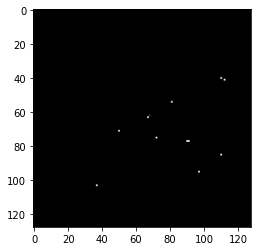

In [99]:
plt.imshow(map_est.squeeze().detach(), cmap='gray')

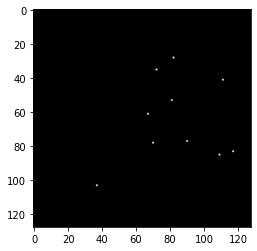

In [100]:
plt.imshow(det_map.squeeze().detach(), cmap='gray')

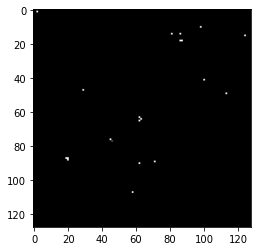

In [97]:
plt.imshow(det_map.squeeze().detach()+map_est.squeeze().detach(), cmap = 'gray')

In [102]:
x = torch.ones((1,1,10,10))

[autoreload of deepMTT failed: Traceback (most recent call last):
  File "/Users/oandrews/miniconda3/envs/deepFit/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/oandrews/miniconda3/envs/deepFit/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/oandrews/miniconda3/envs/deepFit/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/oandrews/miniconda3/envs/deepFit/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 724, in exec_module
  File "<frozen importlib._bootstrap_external>", line 860, in get_code
  File "<frozen importlib._bootstrap_external>", line 791, in source_to_code
  File "<frozen importlib._bootstrap>", line 2

In [103]:
x

tensor([[[[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]]])

In [105]:
x[:, :, 2:-2, 2:-2]

tensor([[[[1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1., 1.]]]])